# Import Libraries

In [2]:
#!pip install ydata_profiling
#!pip install pycaret

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import constants
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
import os
import joblib
import ydata_profiling

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

# Read Data

In [4]:
df = pd.read_csv("/content/Weather Data.csv")
df

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  
0               8.0     101.24                   Fog  
1               8.0     101.24                   Fog  
2               4.0     101.26  Freezing Drizzle,Fog  
3               4.0     101.27  Freezing Drizzle,Fog  
4               4.8     101.23                   Fog  
...             ...        ...                   ...  
8779            9.7     100.13                  Snow  
8780            9.7     100.03                  Snow  
8781            4.8      99.95                  Snow  
8782            9.7      99.91                  Snow  
8783           11.3      99.89                  Snow  

[8784 rows x 8 columns]

# Data Analysis

In [ ]:
df.sample(10)

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
864      2/6/2012 0:00    -0.7              -5.2         72             30.0   
5127    8/1/2012 15:00    27.3              18.6         59             13.0   
7348    11/2/2012 4:00     4.7               2.5         86             20.0   
8675  12/27/2012 11:00    -5.2              -6.4         91             39.0   
1306   2/24/2012 10:00     0.7              -3.0         76              9.0   
3534    5/27/2012 6:00    14.2               2.4         45             17.0   
1645    3/9/2012 13:00    -1.5              -8.8         57             15.0   
1235   2/21/2012 11:00    -0.1              -6.2         63             15.0   
3929   6/12/2012 17:00    18.2              16.3         89             20.0   
714    1/30/2012 18:00    -7.4             -15.6         52             15.0   

      Visibility_km  Press_kPa            Weather  Weather_Label  
864            25.0     100.86             Cloudy              1  
5127           24.1     100.46       Mainly Clear             19  
7348           25.0      99.46             Cloudy              1  
8675            0.6     100.62  Snow,Blowing Snow             39  
1306           19.3     100.25             Cloudy              1  
3534           24.1     101.92      Mostly Cloudy             23  
1645           48.3     101.42       Mainly Clear             19  
1235           48.3     101.55             Cloudy              1  
3929           12.9     100.57               Rain             24  
714            25.0     101.94       Mainly Clear             19

In [ ]:
df.describe()

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa    dayofweek        month      quarter  \
count    8784.000000  8784.000000  8784.000000  8784.000000  8784.000000   
mean       27.664447   101.051623     3.000000     6.513661     2.505464   
std        12.622688     0.844005     2.006933     3.451430     1.118084   
min         0.200000    97.520000     0.000000     1.000000     1.000000   
25%        24.100000   100.560000     1.000000     4.000000     2.000000   
50%        25.000000   101.070000     3.000000     7.000000     3.000000   
75%        25.000000   101.590000     5.000000    10.000000     4.000000   
max        48.300000   103.650000     6.000000    12.000000     4.000000   

         year    dayofyear  
count  8784.0  8784.000000  
mean   2012.0   183.500000  
std       0.0   105.660719  
min    2012.0     1.000000  
25%    2012.0    92.000000  
50%    2012.0   183.500000  
75%    2012.0   275.000000  
max    2012.0   366.000000

In [ ]:
df = df.set_index("Date/Time")
df

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                
1/1/2012 0:00       -1.8              -3.9         86              4.0   
1/1/2012 1:00       -1.8              -3.7         87              4.0   
1/1/2012 2:00       -1.8              -3.4         89              7.0   
1/1/2012 3:00       -1.5              -3.2         88              6.0   
1/1/2012 4:00       -1.5              -3.3         88              7.0   
...                  ...               ...        ...              ...   
12/31/2012 19:00     0.1              -2.7         81             30.0   
12/31/2012 20:00     0.2              -2.4         83             24.0   
12/31/2012 21:00    -0.5              -1.5         93             28.0   
12/31/2012 22:00    -0.2              -1.8         89             28.0   
12/31/2012 23:00     0.0              -2.1         86             30.0   

                  Visibility_km  Press_kPa               Weather  \
Date/Time                                                          
1/1/2012 0:00               8.0     101.24                   Fog   
1/1/2012 1:00               8.0     101.24                   Fog   
1/1/2012 2:00               4.0     101.26  Freezing Drizzle,Fog   
1/1/2012 3:00               4.0     101.27  Freezing Drizzle,Fog   
1/1/2012 4:00               4.8     101.23                   Fog   
...                         ...        ...                   ...   
12/31/2012 19:00            9.7     100.13                  Snow   
12/31/2012 20:00            9.7     100.03                  Snow   
12/31/2012 21:00            4.8      99.95                  Snow   
12/31/2012 22:00            9.7      99.91                  Snow   
12/31/2012 23:00           11.3      99.89                  Snow   

                  Weather_Label  
Date/Time                        
1/1/2012 0:00                 7  
1/1/2012 1:00                 7  
1/1/2012 2:00                 9  
1/1/2012 3:00                 9  
1/1/2012 4:00                 7  
...                         ...  
12/31/2012 19:00             35  
12/31/2012 20:00             35  
12/31/2012 21:00             35  
12/31/2012 22:00             35  
12/31/2012 23:00             35  

[8784 rows x 8 columns]

In [ ]:
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   float64
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
 7   Weather_Label     8784 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 617.6+ KB


In [ ]:
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
df["quarter"] = df.index.quarter
df["year"] = df.index.year
df["dayofyear"] = df.index.dayofyear
df

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 00:00:00    -1.8              -3.9         86              4.0   
2012-01-01 01:00:00    -1.8              -3.7         87              4.0   
2012-01-01 02:00:00    -1.8              -3.4         89              7.0   
2012-01-01 03:00:00    -1.5              -3.2         88              6.0   
2012-01-01 04:00:00    -1.5              -3.3         88              7.0   
...                     ...               ...        ...              ...   
2012-12-31 19:00:00     0.1              -2.7         81             30.0   
2012-12-31 20:00:00     0.2              -2.4         83             24.0   
2012-12-31 21:00:00    -0.5              -1.5         93             28.0   
2012-12-31 22:00:00    -0.2              -1.8         89             28.0   
2012-12-31 23:00:00     0.0              -2.1         86             30.0   

                     Visibility_km  Press_kPa               Weather  \
Date/Time                                                             
2012-01-01 00:00:00            8.0     101.24                   Fog   
2012-01-01 01:00:00            8.0     101.24                   Fog   
2012-01-01 02:00:00            4.0     101.26  Freezing Drizzle,Fog   
2012-01-01 03:00:00            4.0     101.27  Freezing Drizzle,Fog   
2012-01-01 04:00:00            4.8     101.23                   Fog   
...                            ...        ...                   ...   
2012-12-31 19:00:00            9.7     100.13                  Snow   
2012-12-31 20:00:00            9.7     100.03                  Snow   
2012-12-31 21:00:00            4.8      99.95                  Snow   
2012-12-31 22:00:00            9.7      99.91                  Snow   
2012-12-31 23:00:00           11.3      99.89                  Snow   

                     Weather_Label  dayofweek  month  quarter  year  dayofyear  
Date/Time                                                                       
2012-01-01 00:00:00              7          6      1        1  2012          1  
2012-01-01 01:00:00              7          6      1        1  2012          1  
2012-01-01 02:00:00              9          6      1        1  2012          1  
2012-01-01 03:00:00              9          6      1        1  2012          1  
2012-01-01 04:00:00              7          6      1        1  2012          1  
...                            ...        ...    ...      ...   ...        ...  
2012-12-31 19:00:00             35          0     12        4  2012        366  
2012-12-31 20:00:00             35          0     12        4  2012        366  
2012-12-31 21:00:00             35          0     12        4  2012        366  
2012-12-31 22:00:00             35          0     12        4  2012        366  
2012-12-31 23:00:00             35          0     12        4  2012        366  

[8784 rows x 13 columns]

In [ ]:
df["Weather"].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [ ]:
df[df['Weather'] == 'Snow']

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-03 07:00:00   -14.0             -19.5         63               19   
2012-01-04 12:00:00   -13.7             -21.7         51               11   
2012-01-04 14:00:00   -11.3             -19.0         53                7   
2012-01-04 15:00:00   -10.2             -16.3         61               11   
2012-01-04 16:00:00    -9.4             -15.5         61               13   
...                     ...               ...        ...              ...   
2012-12-31 19:00:00     0.1              -2.7         81               30   
2012-12-31 20:00:00     0.2              -2.4         83               24   
2012-12-31 21:00:00    -0.5              -1.5         93               28   
2012-12-31 22:00:00    -0.2              -1.8         89               28   
2012-12-31 23:00:00     0.0              -2.1         86               30   

                     Visibility_km  Press_kPa Weather  dayofweek  month  \
Date/Time                                                                 
2012-01-03 07:00:00           25.0     100.95    Snow          1      1   
2012-01-04 12:00:00           24.1     101.25    Snow          2      1   
2012-01-04 14:00:00           19.3     100.97    Snow          2      1   
2012-01-04 15:00:00            9.7     100.89    Snow          2      1   
2012-01-04 16:00:00           19.3     100.79    Snow          2      1   
...                            ...        ...     ...        ...    ...   
2012-12-31 19:00:00            9.7     100.13    Snow          0     12   
2012-12-31 20:00:00            9.7     100.03    Snow          0     12   
2012-12-31 21:00:00            4.8      99.95    Snow          0     12   
2012-12-31 22:00:00            9.7      99.91    Snow          0     12   
2012-12-31 23:00:00           11.3      99.89    Snow          0     12   

                     quarter  year  dayofyear  
Date/Time                                      
2012-01-03 07:00:00        1  2012          3  
2012-01-04 12:00:00        1  2012          4  
2012-01-04 14:00:00        1  2012          4  
2012-01-04 15:00:00        1  2012          4  
2012-01-04 16:00:00        1  2012          4  
...                      ...   ...        ...  
2012-12-31 19:00:00        4  2012        366  
2012-12-31 20:00:00        4  2012        366  
2012-12-31 21:00:00        4  2012        366  
2012-12-31 22:00:00        4  2012        366  
2012-12-31 23:00:00        4  2012        366  

[390 rows x 12 columns]

In [ ]:
df[df['Weather'] == 'Cloudy']

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 17:00:00     3.0               0.0         81               13   
2012-01-01 20:00:00     3.2               1.3         87               19   
2012-01-01 21:00:00     4.0               1.7         85               20   
2012-01-01 23:00:00     5.3               2.0         79               30   
2012-01-02 01:00:00     4.6               0.0         72               39   
...                     ...               ...        ...              ...   
2012-12-31 01:00:00   -10.7             -14.0         77               15   
2012-12-31 02:00:00   -10.1             -13.4         77                9   
2012-12-31 04:00:00   -10.5             -12.8         83               11   
2012-12-31 05:00:00   -10.2             -12.4         84                6   
2012-12-31 06:00:00    -9.7             -11.7         85                4   

                     Visibility_km  Press_kPa Weather  dayofweek  month  \
Date/Time                                                                 
2012-01-01 17:00:00           16.1      99.81  Cloudy          6      1   
2012-01-01 20:00:00           25.0      99.50  Cloudy          6      1   
2012-01-01 21:00:00           25.0      99.39  Cloudy          6      1   
2012-01-01 23:00:00           25.0      99.31  Cloudy          6      1   
2012-01-02 01:00:00           25.0      99.26  Cloudy          0      1   
...                            ...        ...     ...        ...    ...   
2012-12-31 01:00:00           25.0     101.50  Cloudy          0     12   
2012-12-31 02:00:00           25.0     101.45  Cloudy          0     12   
2012-12-31 04:00:00           25.0     101.34  Cloudy          0     12   
2012-12-31 05:00:00           25.0     101.28  Cloudy          0     12   
2012-12-31 06:00:00           25.0     101.23  Cloudy          0     12   

                     quarter  year  dayofyear  
Date/Time                                      
2012-01-01 17:00:00        1  2012          1  
2012-01-01 20:00:00        1  2012          1  
2012-01-01 21:00:00        1  2012          1  
2012-01-01 23:00:00        1  2012          1  
2012-01-02 01:00:00        1  2012          2  
...                      ...   ...        ...  
2012-12-31 01:00:00        4  2012        366  
2012-12-31 02:00:00        4  2012        366  
2012-12-31 04:00:00        4  2012        366  
2012-12-31 05:00:00        4  2012        366  
2012-12-31 06:00:00        4  2012        366  

[1728 rows x 12 columns]

In [ ]:
AA = df.groupby('Weather').mean()
AA

Temp_C  Dew Point Temp_C  \
Weather                                                                
Clear                                     6.825716          0.089367   
Cloudy                                    7.970544          2.375810   
Drizzle                                   7.353659          5.504878   
Drizzle,Fog                               8.067500          7.033750   
Drizzle,Ice Pellets,Fog                   0.400000         -0.700000   
Drizzle,Snow                              1.050000          0.150000   
Drizzle,Snow,Fog                          0.693333          0.120000   
Fog                                       4.303333          3.159333   
Freezing Drizzle                         -5.657143         -8.000000   
Freezing Drizzle,Fog                     -2.533333         -4.183333   
Freezing Drizzle,Haze                    -5.433333         -8.000000   
Freezing Drizzle,Snow                    -5.109091         -7.072727   
Freezing Fog                             -7.575000         -9.250000   
Freezing Rain                            -3.885714         -6.078571   
Freezing Rain,Fog                        -2.225000         -3.750000   
Freezing Rain,Haze                       -4.900000         -7.450000   
Freezing Rain,Ice Pellets,Fog            -2.600000         -3.700000   
Freezing Rain,Snow Grains                -5.000000         -7.300000   
Haze                                     -0.200000         -2.975000   
Mainly Clear                             12.558927          4.581671   
Moderate Rain,Fog                         1.700000          0.800000   
Moderate Snow                            -5.525000         -7.250000   
Moderate Snow,Blowing Snow               -5.450000         -6.500000   
Mostly Cloudy                            10.574287          3.131174   
Rain                                      9.786275          7.042810   
Rain Showers                             13.722340          9.187766   
Rain Showers,Fog                         12.800000         12.100000   
Rain Showers,Snow Showers                 2.150000         -1.500000   
Rain,Fog                                  8.273276          7.219828   
Rain,Haze                                 4.633333          2.066667   
Rain,Ice Pellets                          0.600000         -0.600000   
Rain,Snow                                 1.055556         -0.566667   
Rain,Snow Grains                          1.900000         -2.100000   
Rain,Snow,Fog                             0.800000          0.300000   
Rain,Snow,Ice Pellets                     1.100000         -0.175000   
Snow                                     -4.524103         -7.623333   
Snow Pellets                              0.700000         -6.400000   
Snow Showers                             -3.506667         -7.866667   
Snow Showers,Fog                        -10.675000        -11.900000   
Snow,Blowing Snow                        -5.410526         -7.621053   
Snow,Fog                                 -5.075676         -6.364865   
Snow,Haze                                -4.020000         -6.860000   
Snow,Ice Pellets                         -1.883333         -3.666667   
Thunderstorms                            24.150000         19.750000   
Thunderstorms,Heavy Rain Showers         10.900000          9.000000   
Thunderstorms,Moderate Rain Showers,Fog  19.600000         18.500000   
Thunderstorms,Rain                       20.433333         18.533333   
Thunderstorms,Rain Showers               20.037500         17.618750   
Thunderstorms,Rain Showers,Fog           21.600000         18.700000   
Thunderstorms,Rain,Fog                   20.600000         18.600000   

                                         Rel Hum_%  Wind Speed_km/h  \
Weather                                                               
Clear                                    64.497738        10.557315   
Cloudy                                   69.592593        16.127315   
Drizzle        

# Data Visualization

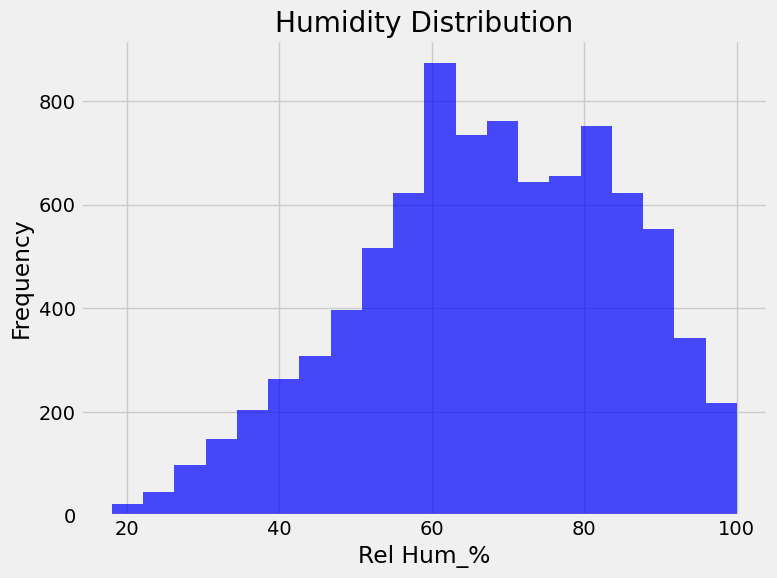

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rel Hum_%'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Rel Hum_%')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

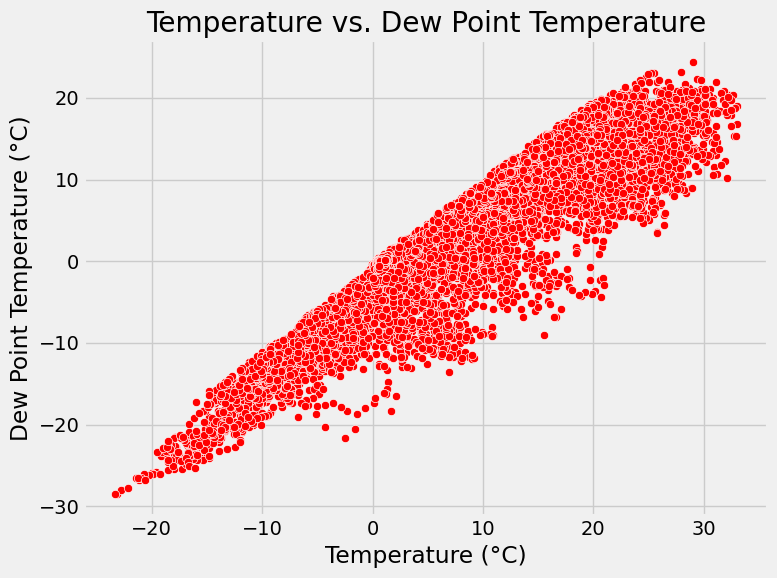

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=df, color='Red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()

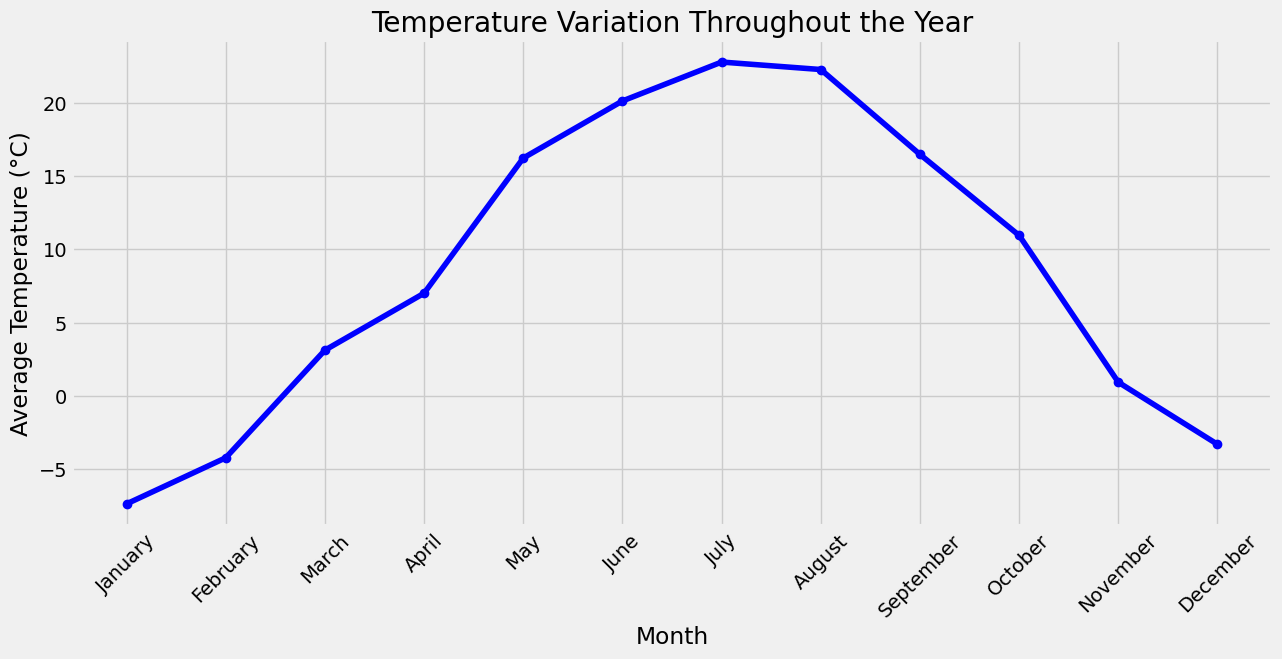

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Month'] = df['Date/Time'].dt.month

monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()

month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

# Plot the temperature variation throughout the year
plt.figure(figsize=(20, 6))
plt.plot(month_names, monthly_avg_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Variation Throughout the Year')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplots_adjust(left=0.2, right=0.8)

plt.show()

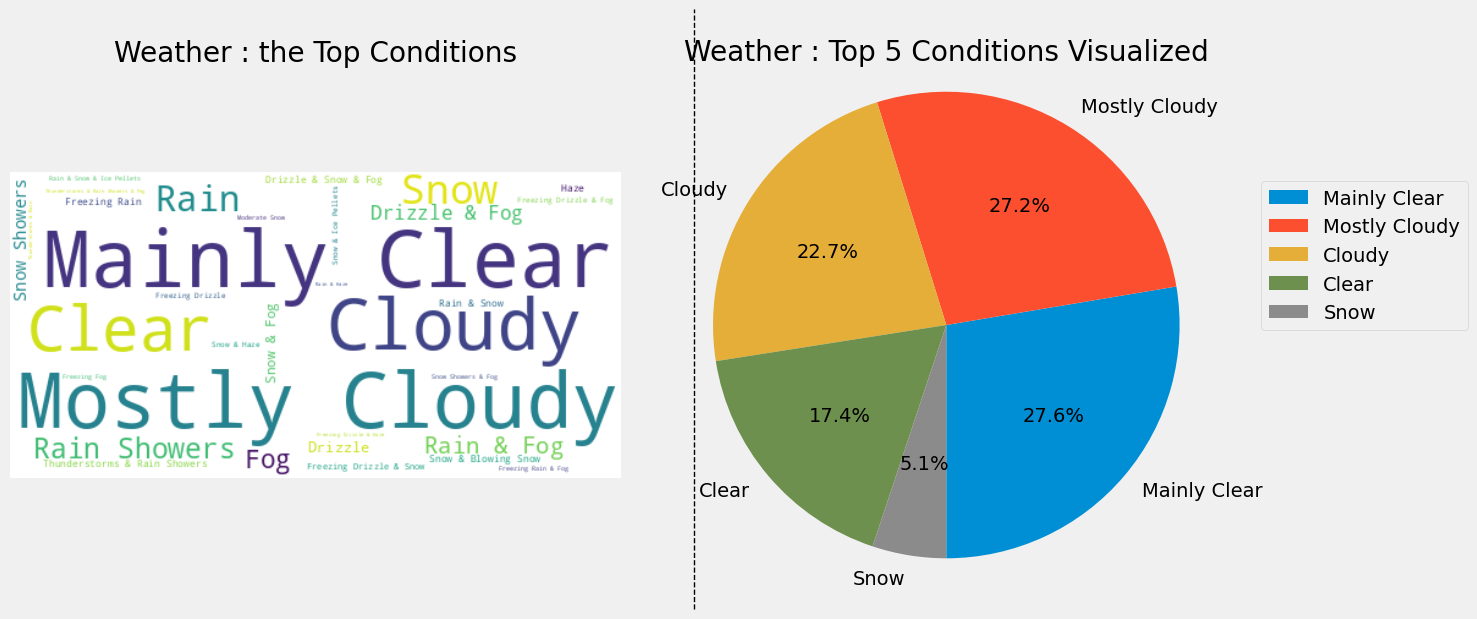

In [ ]:
df['Weather'] = df['Weather'].str.replace(',', ' & ')

# Get the frequency of each unique weather condition in the 'Weather' column
weather_counts = df['Weather'].value_counts()

# Get the top 5 most frequent weather conditions
top_5_weather = weather_counts.head(5)

# Create a word cloud object with the word frequencies
wordcloud = WordCloud(width=500, height=250, background_color='white').generate_from_frequencies(weather_counts)

# Plotting the word cloud and pie chart side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Word Cloud on the left
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Weather : the Top Conditions', pad=80)
axes[0].axis('off')

line_position = 0.47
fig.add_artist(plt.Line2D([line_position, line_position], [0, 1], color='black', linestyle='--', linewidth=1))

# Pie Chart on the right
axes[1].pie(top_5_weather.values, labels=top_5_weather.index, autopct='%1.1f%%', startangle=270)
axes[1].set_title("Weather : Top 5 Conditions Visualized")
axes[1].legend(bbox_to_anchor=(1, 0.8), loc='upper left')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

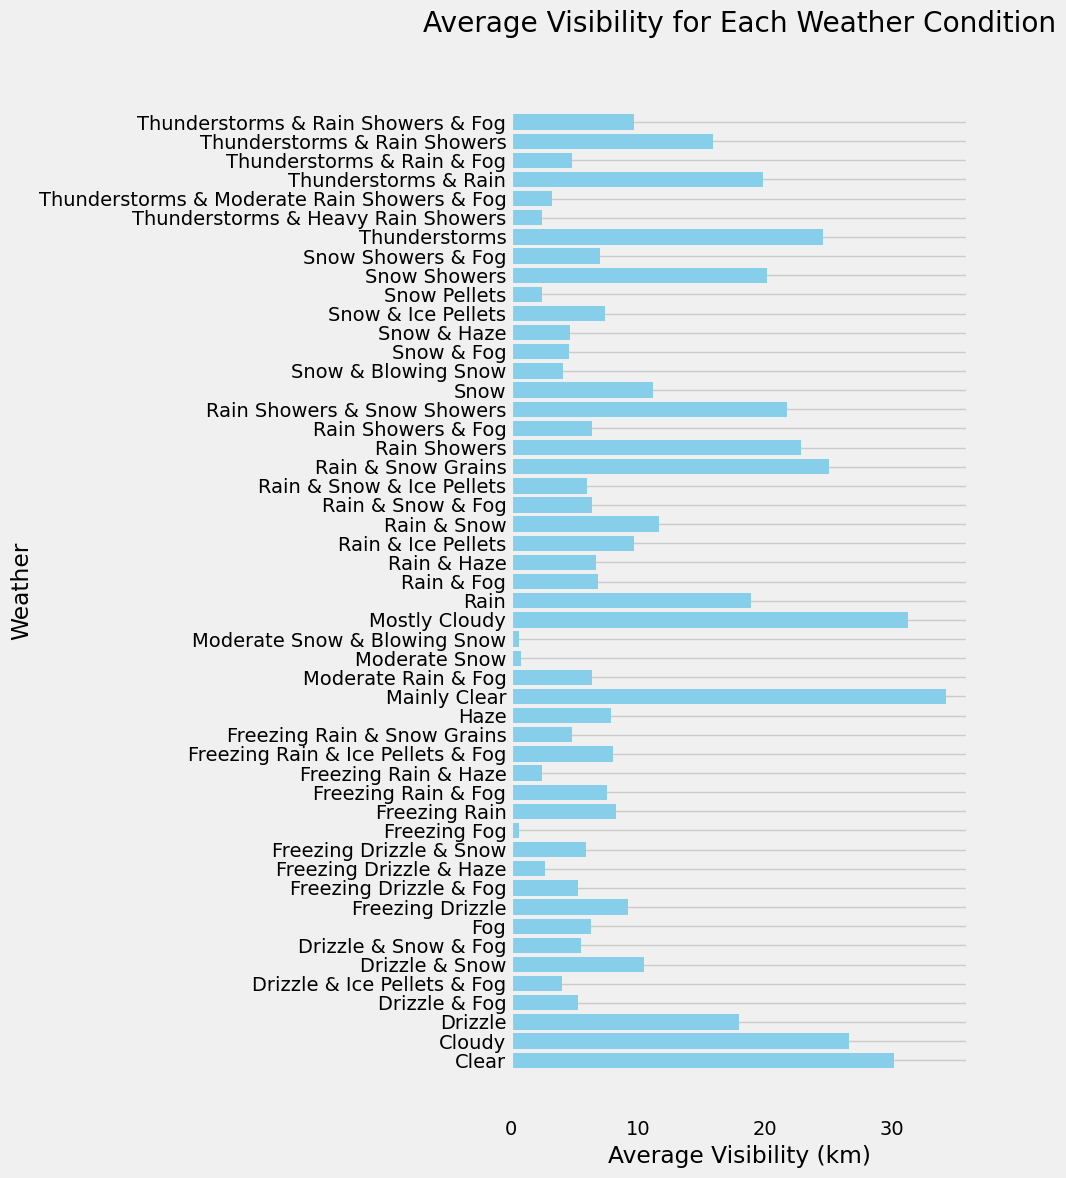

In [ ]:
weather_avg_vsb = df.groupby('Weather')['Visibility_km'].mean()

weather_conditions = weather_avg_vsb.index
average_visibility = weather_avg_vsb.values

# Create a horizontal bar plot for average visibility vs. weather conditions
plt.figure(figsize=(10, 12))
plt.barh(weather_conditions, average_visibility, color='skyblue')
plt.xlabel('Average Visibility (km)')
plt.ylabel('Weather')
plt.title('Average Visibility for Each Weather Condition', pad=25)
plt.grid(axis='x')
plt.tight_layout()

plt.show()

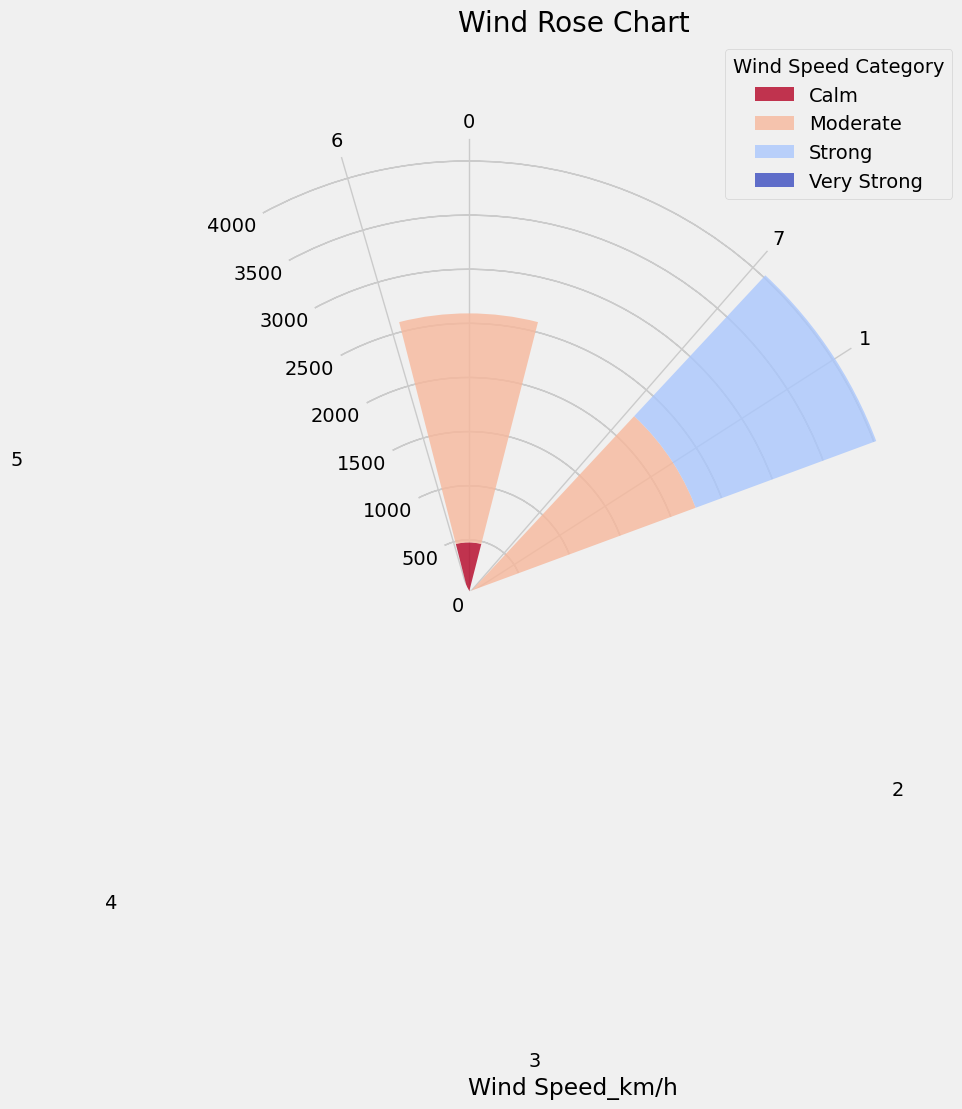

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

df['Wind Speed Category'] = pd.cut(df['Wind Speed_km/h'], bins=[0, 5, 15, 30, 100], labels=['Calm', 'Moderate', 'Strong', 'Very Strong'])

wind_directions = df['Wind Speed Category'].groupby(pd.cut(df['Wind Speed_km/h'], bins=8, labels=False)).value_counts().unstack(fill_value=0)
wind_directions.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm_r', alpha=0.8)

plt.title('Wind Rose Chart')
plt.legend(title='Wind Speed Category', bbox_to_anchor=(1.1, 1))
plt.show()

<Figure size 1200x600 with 0 Axes>

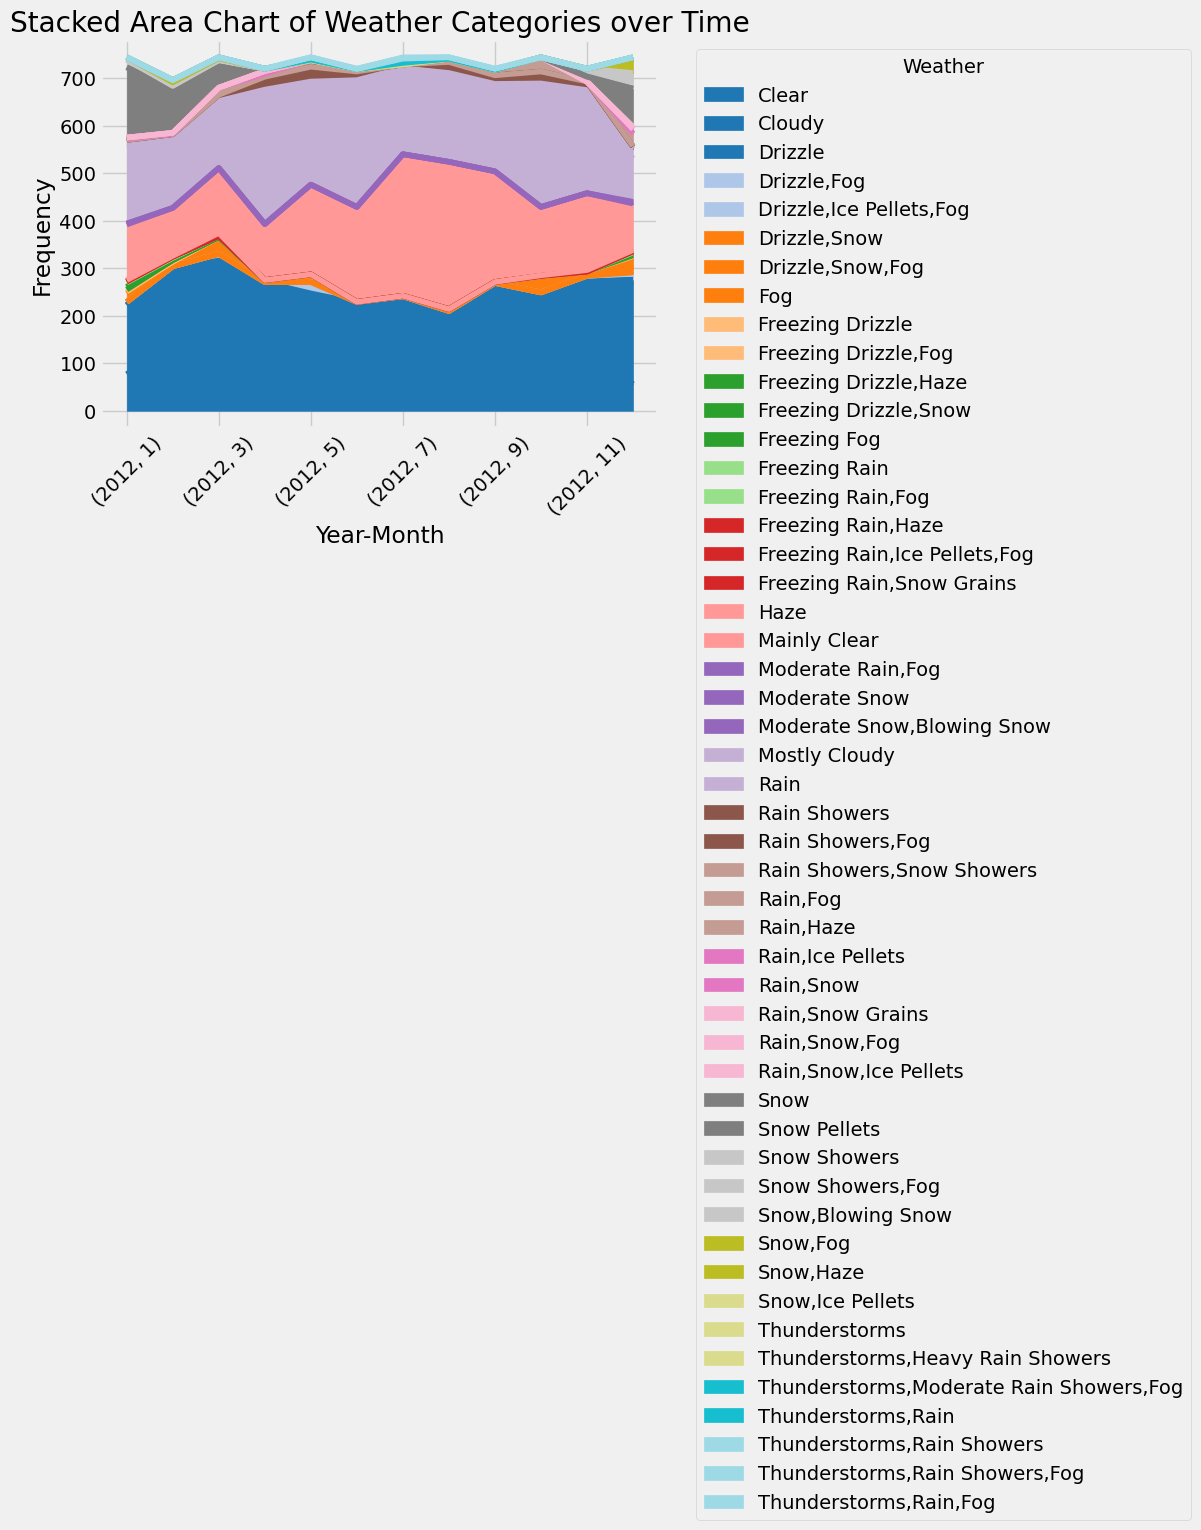

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month

weather_counts_by_month = df.groupby(['Year', 'Month', 'Weather'])['Weather'].count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
weather_counts_by_month.plot.area(stacked=True, colormap='tab20')
plt.title('Stacked Area Chart of Weather Categories over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

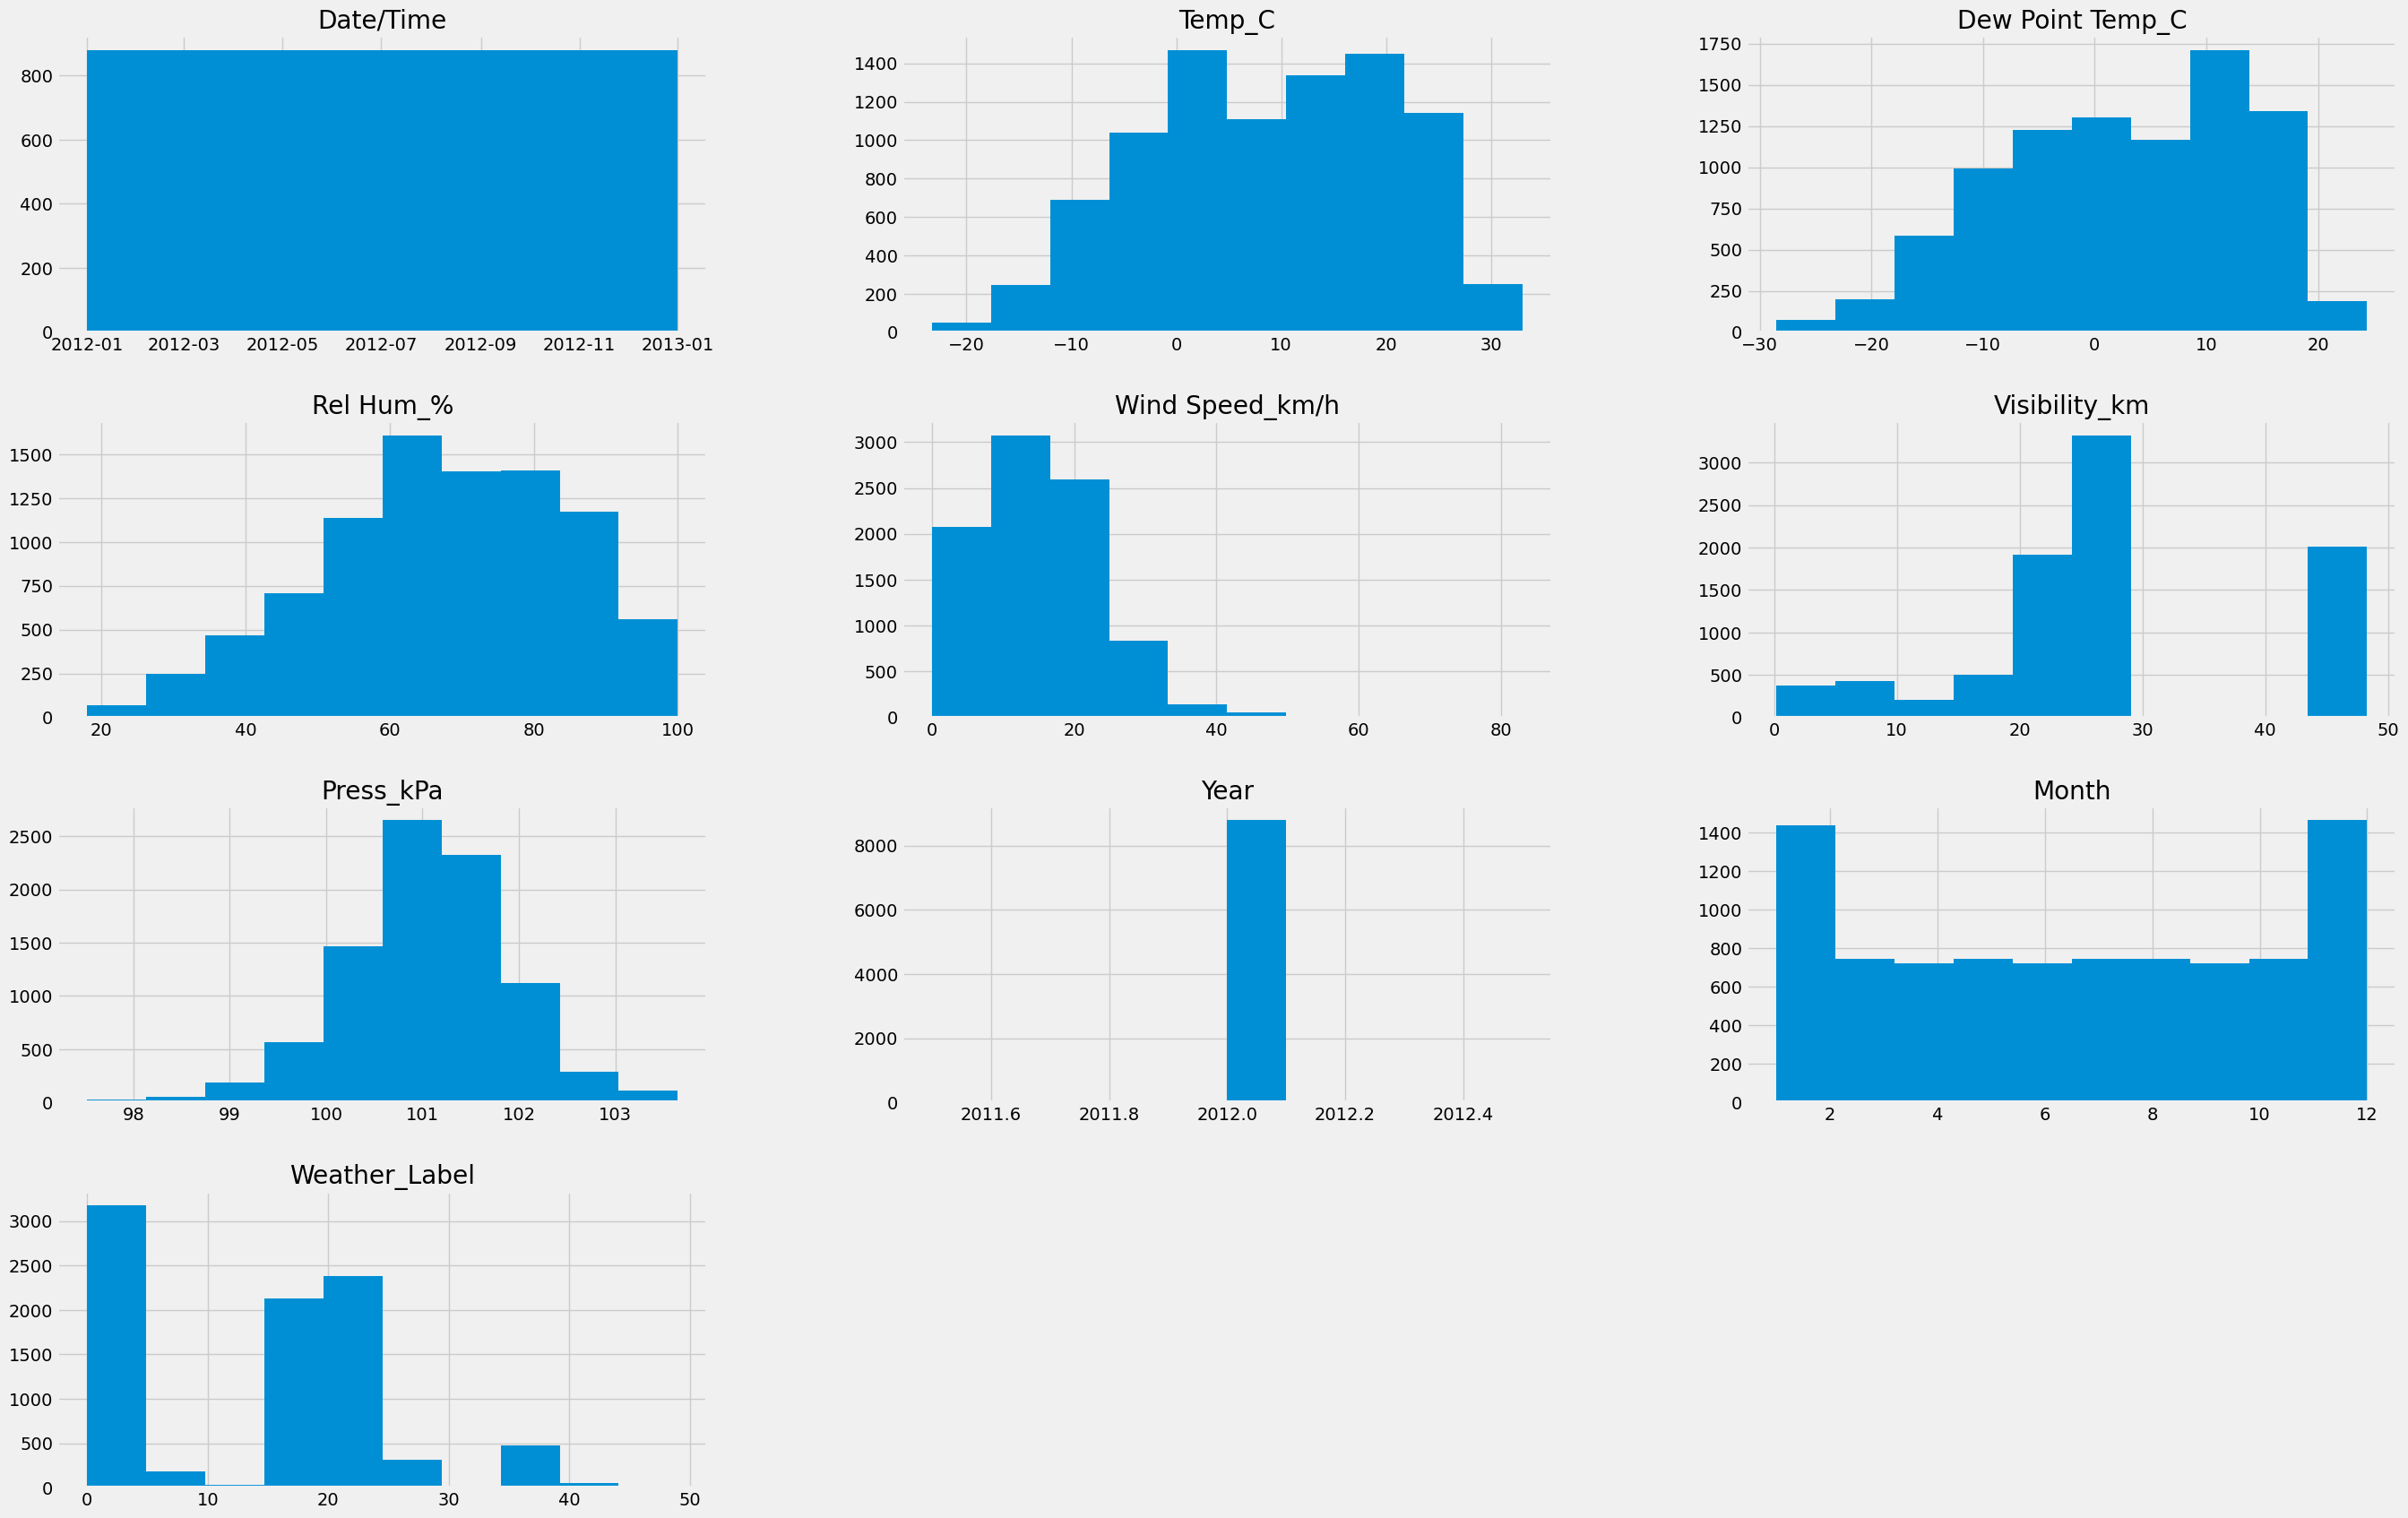

In [ ]:
df.hist(figsize=(30,20))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


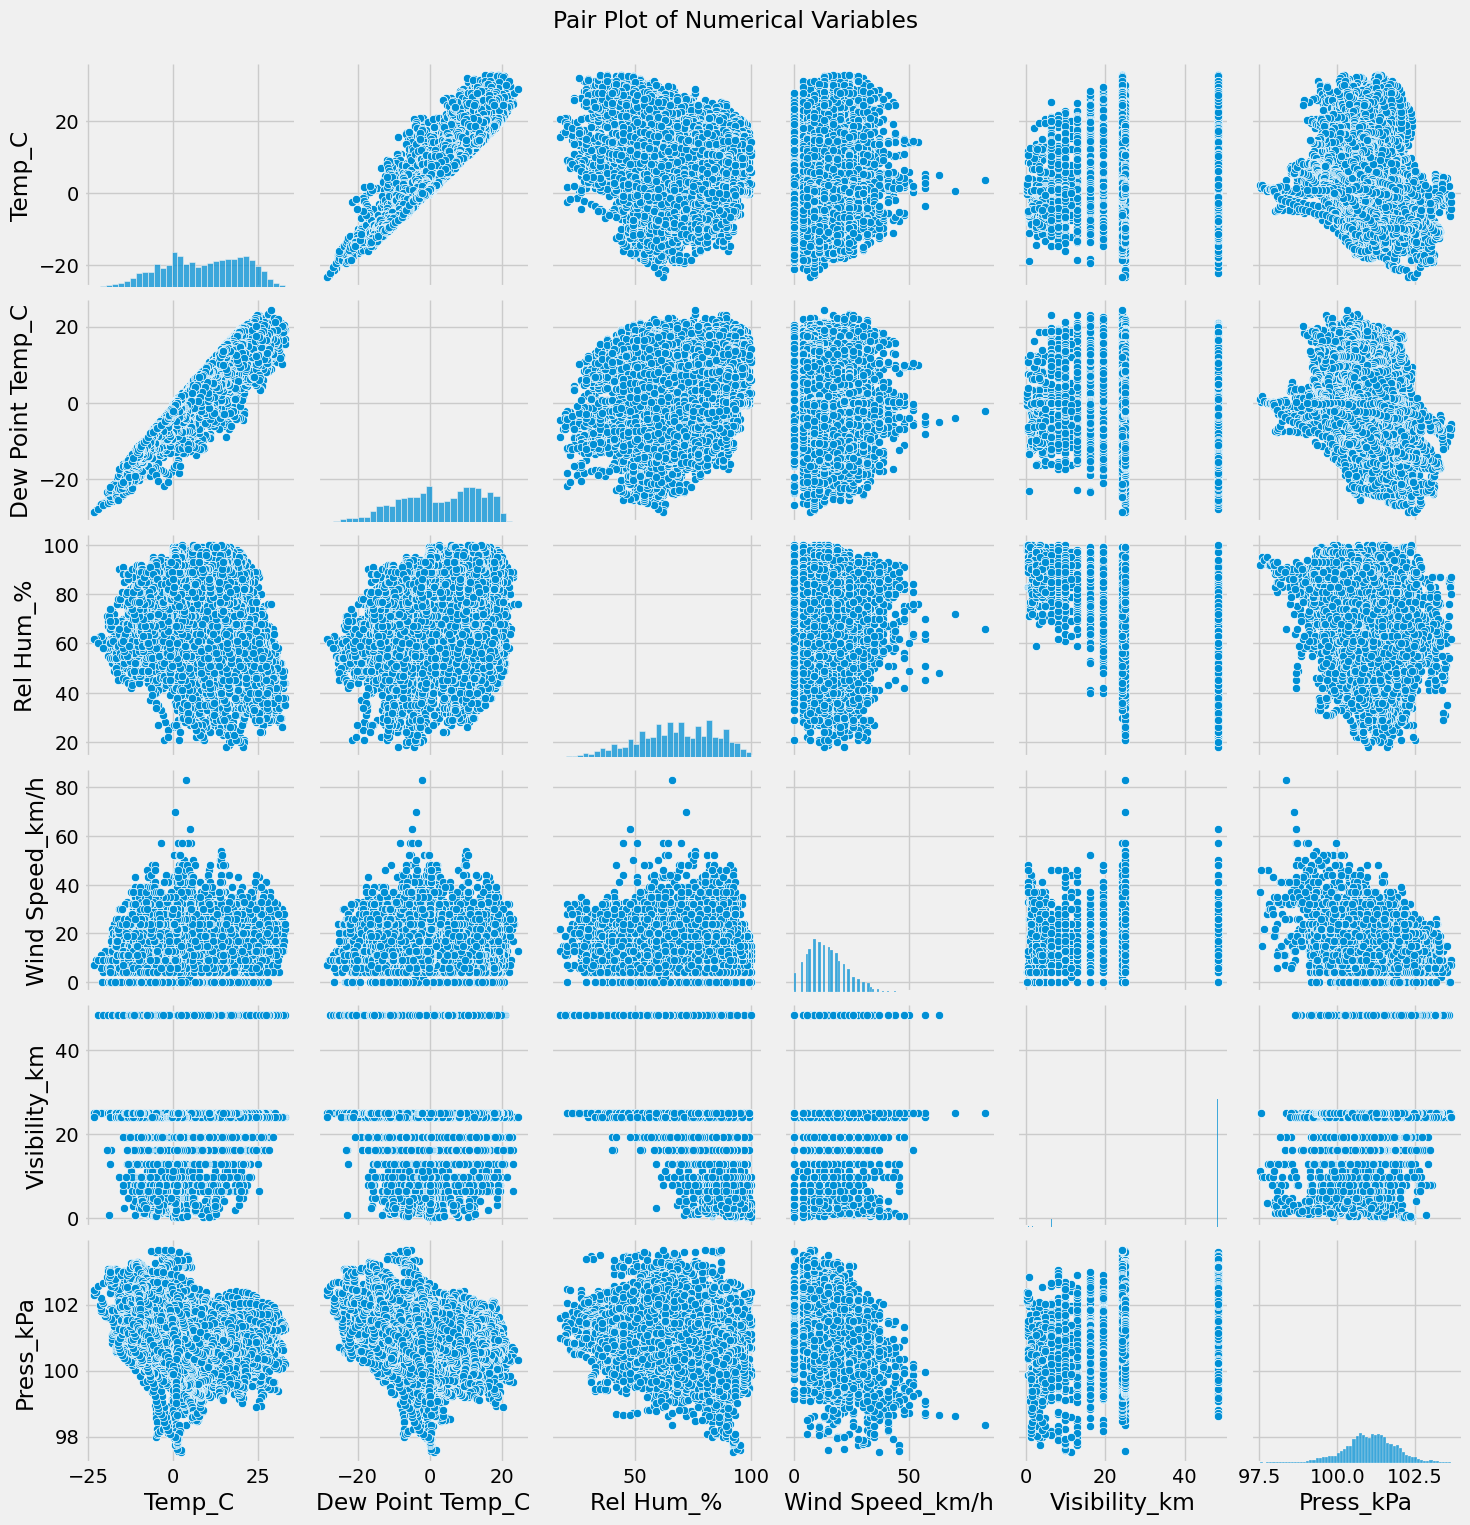

In [ ]:
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

/tmp/ipykernel_33/2524767648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=1)


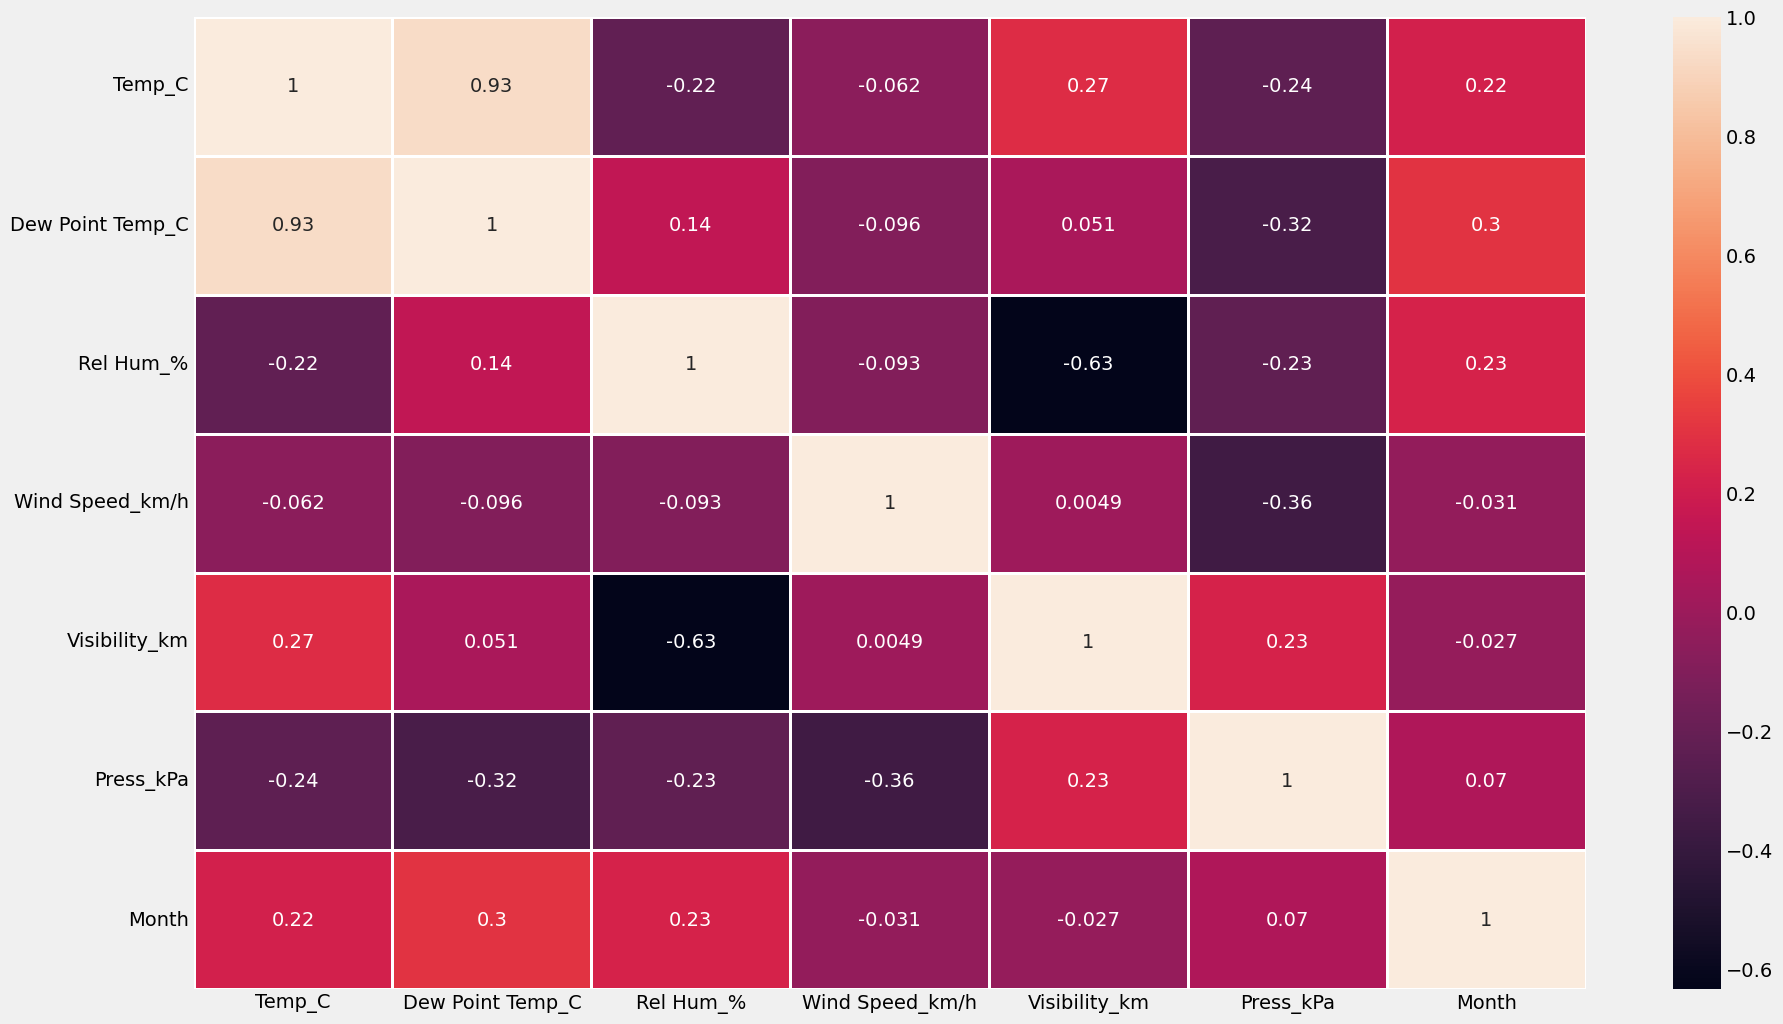

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

# ML Model

In [ ]:
le=LabelEncoder()
df["Weather"]=le.fit_transform(df["Weather"])

In [ ]:
train = df.loc[df.index<"30-06-2012"]
test = df.loc[df.index>="30-06-2012"]

/opt/conda/lib/python3.10/site-packages/matplotlib/axis.py:1732: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ret = self.converter.convert(x, self.units, self)
/tmp/ipykernel_33/549870131.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("train","test")


Text(0.5, 1.0, 'Train Test Split')

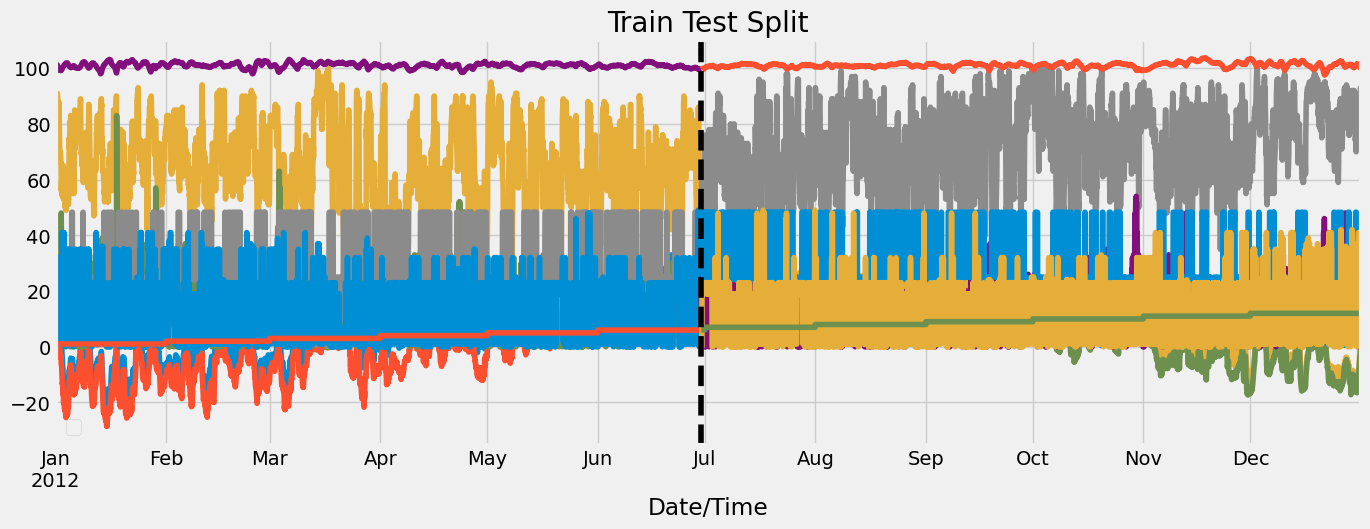

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline("30-06-2012",color='black',ls='--')
plt.legend("train","test")
plt.title('Train Test Split')

In [ ]:
xtrain = train.drop('Weather',axis=1)
ytrain =train['Weather']


xtest = test.drop('Weather',axis=1)
ytest = test['Weather']

In [ ]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

model.fit(xtrain,ytrain)

[12:30:36] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model.score(xtrain,ytrain)

0.8154740256935049

In [ ]:
p1 = model.predict(xtest)
p1

array([16.827927, 17.499784, 17.497309, ..., 22.783377, 21.956758,
       23.69627 ], dtype=float32)

In [ ]:
mean_squared_error(p1,ytest)

149.38789118096986

In [ ]:
np.sqrt(mean_squared_error(p1,ytest))

12.222433930317228

In [ ]:
df

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  
0               8.0     101.24                   Fog  
1               8.0     101.24                   Fog  
2               4.0     101.26  Freezing Drizzle,Fog  
3               4.0     101.27  Freezing Drizzle,Fog  
4               4.8     101.23                   Fog  
...             ...        ...                   ...  
8779            9.7     100.13                  Snow  
8780            9.7     100.03                  Snow  
8781            4.8      99.95                  Snow  
8782            9.7      99.91                  Snow  
8783           11.3      99.89                  Snow  

[8784 rows x 8 columns]

In [ ]:
df.drop(["Date/Time"],inplace=True,axis=1)

In [ ]:
xtrain=df.iloc[:,:-1]
xtrain

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0       -1.8              -3.9         86                4            8.0   
1       -1.8              -3.7         87                4            8.0   
2       -1.8              -3.4         89                7            4.0   
3       -1.5              -3.2         88                6            4.0   
4       -1.5              -3.3         88                7            4.8   
...      ...               ...        ...              ...            ...   
8779     0.1              -2.7         81               30            9.7   
8780     0.2              -2.4         83               24            9.7   
8781    -0.5              -1.5         93               28            4.8   
8782    -0.2              -1.8         89               28            9.7   
8783     0.0              -2.1         86               30           11.3   

      Press_kPa  
0        101.24  
1        101.24  
2        101.26  
3        101.27  
4        101.23  
...         ...  
8779     100.13  
8780     100.03  
8781      99.95  
8782      99.91  
8783      99.89  

[8784 rows x 6 columns]

In [ ]:
ytrain=df.iloc[:,-1]
ytrain

0        7
1        7
2        9
3        9
4        7
        ..
8779    35
8780    35
8781    35
8782    35
8783    35
Name: Weather, Length: 8784, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
xtrain,ytrain=sm.fit_resample(xtrain,ytrain)

ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.38188277, 0.46502836, 0.82926829, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.46880907, 0.84146341, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.47448015, 0.86585366, 0.08433735, 0.07900208,
        0.61011419],
       ...,
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(Xsc,ytrain,test_size=0.1,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([27,  8, 44, ..., 34, 17, 47])

In [ ]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(xtrain,ytrain)
ypred1=knn1.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       223
           1       0.71      0.60      0.65       215
           2       0.99      1.00      0.99       221
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       192
           6       1.00      1.00      1.00       225
           7       0.98      1.00      0.99       211
           8       1.00      1.00      1.00       194
           9       1.00      1.00      1.00       195
          10       1.00      1.00      1.00       203
          11       1.00      1.00      1.00       191
          12       1.00      1.00      1.00       212
          13       1.00      1.00      1.00       213
          14       1.00      1.00      1.00       207
          15       1.00      1.00      1.00       187
          16       1.00      1.00      1.00       222
          17       1.00    

In [ ]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(xtrain,ytrain)
ypred2=sv.predict(xtest)
ypred2

array([27,  8, 44, ..., 34, 17, 24])

In [ ]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.43      0.52      0.47       223
           1       0.45      0.11      0.17       215
           2       0.59      0.80      0.68       221
           3       0.59      0.62      0.61       208
           4       0.97      1.00      0.98       234
           5       0.98      1.00      0.99       192
           6       0.89      1.00      0.94       225
           7       0.62      0.54      0.57       211
           8       0.71      0.84      0.77       194
           9       0.95      1.00      0.97       195
          10       0.99      1.00      1.00       203
          11       0.79      0.73      0.76       191
          12       0.97      1.00      0.99       212
          13       0.73      0.65      0.69       213
          14       0.78      1.00      0.87       207
          15       1.00      1.00      1.00       187
          16       1.00      1.00      1.00       222
          17       1.00    

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred2=nb.predict(xtest)
ypred2

array([27,  8, 44, ..., 34, 17, 25])

In [ ]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.43      0.29      0.34       223
           1       0.25      0.03      0.05       215
           2       0.47      0.58      0.52       221
           3       0.56      0.41      0.48       208
           4       1.00      1.00      1.00       234
           5       0.98      1.00      0.99       192
           6       0.57      1.00      0.73       225
           7       0.49      0.22      0.31       211
           8       0.26      0.42      0.32       194
           9       0.43      0.44      0.44       195
          10       1.00      1.00      1.00       203
          11       0.43      0.36      0.39       191
          12       0.96      1.00      0.98       212
          13       0.51      0.37      0.43       213
          14       0.38      0.35      0.37       207
          15       1.00      1.00      1.00       187
          16       1.00      1.00      1.00       222
          17       1.00    

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=10)
dt.fit(xtrain,ytrain)
ypred3=dt.predict(xtest)
ypred3

array([27,  8, 44, ..., 34, 17, 47])

In [ ]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.39      0.70      0.50       223
           1       0.37      0.15      0.22       215
           2       0.79      0.77      0.78       221
           3       0.67      0.84      0.74       208
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       192
           6       1.00      1.00      1.00       225
           7       0.88      0.55      0.68       211
           8       0.79      1.00      0.88       194
           9       0.92      1.00      0.96       195
          10       1.00      1.00      1.00       203
          11       0.85      1.00      0.92       191
          12       1.00      1.00      1.00       212
          13       0.93      0.81      0.87       213
          14       0.94      1.00      0.97       207
          15       1.00      1.00      1.00       187
          16       1.00      1.00      1.00       222
          17       1.00    

In [ ]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(xtrain,ytrain)
ypred4=rf.predict(xtest)
ypred4

array([27,  8, 44, ..., 34, 17, 47])

In [ ]:
print(classification_report(ytest,ypred4))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       223
           1       0.73      0.68      0.71       215
           2       0.99      1.00      1.00       221
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       192
           6       1.00      1.00      1.00       225
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       194
           9       1.00      1.00      1.00       195
          10       1.00      1.00      1.00       203
          11       1.00      1.00      1.00       191
          12       1.00      1.00      1.00       212
          13       1.00      1.00      1.00       213
          14       1.00      1.00      1.00       207
          15       1.00      1.00      1.00       187
          16       1.00      1.00      1.00       222
          17       1.00    

In [ ]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred7=xgb.predict(xtest)
ypred7

array([27,  8, 44, ..., 34, 17, 47])

In [ ]:
print(classification_report(ytest,ypred7))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       223
           1       0.64      0.52      0.57       215
           2       1.00      1.00      1.00       221
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       192
           6       1.00      1.00      1.00       225
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       194
           9       1.00      1.00      1.00       195
          10       1.00      1.00      1.00       203
          11       1.00      1.00      1.00       191
          12       1.00      1.00      1.00       212
          13       1.00      1.00      1.00       213
          14       1.00      1.00      1.00       207
          15       1.00      1.00      1.00       187
          16       1.00      1.00      1.00       222
          17       1.00    

In [ ]:
label_encoder = LabelEncoder()
df['Weather_Label'] = label_encoder.fit_transform(df['Weather'])

median_wind_speed = df['Wind Speed_km/h'].loc[df['Wind Speed_km/h'] != 'Calm'].median()
df.loc[df['Wind Speed_km/h'] == 'Calm', 'Wind Speed_km/h'] = median_wind_speed
df['Wind Speed_km/h'] = df['Wind Speed_km/h'].astype(float)

Xtrain1 = df.drop(['Weather', 'Date/Time', 'Weather_Label'], axis=1)
ytrain1 = df['Weather_Label']
scaler = StandardScaler()
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xtrain1, ytrain1, test_size=0.2, random_state=42)

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC()
naive_bayes = GaussianNB()
gradient_boosting = GradientBoostingClassifier(random_state=42)
classifiers = [logistic_regression, decision_tree, random_forest, knn, svm, naive_bayes, gradient_boosting]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Gradient Boosting']

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.36881047239612974


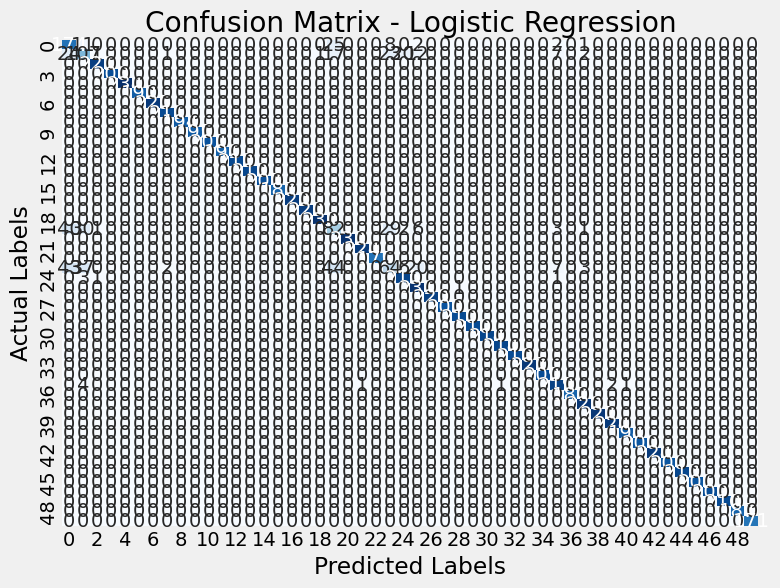

Decision Tree Accuracy: 0.4900398406374502


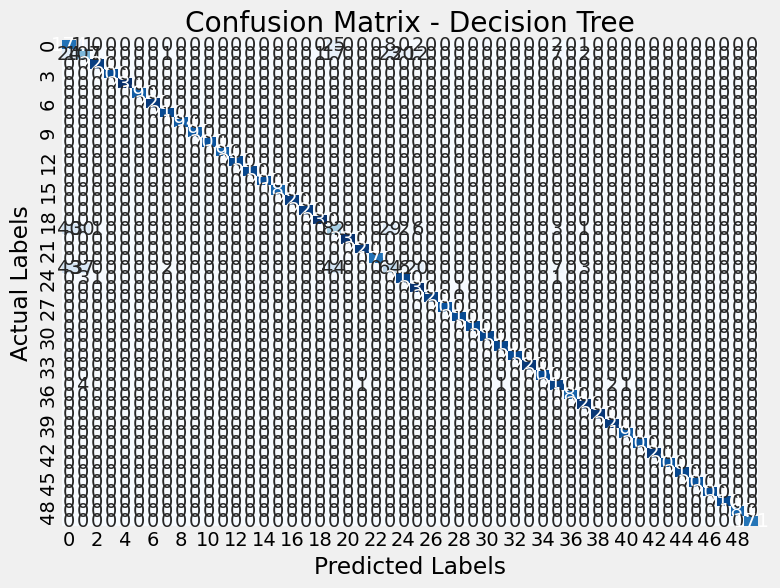

Random Forest Accuracy: 0.5782583949914627


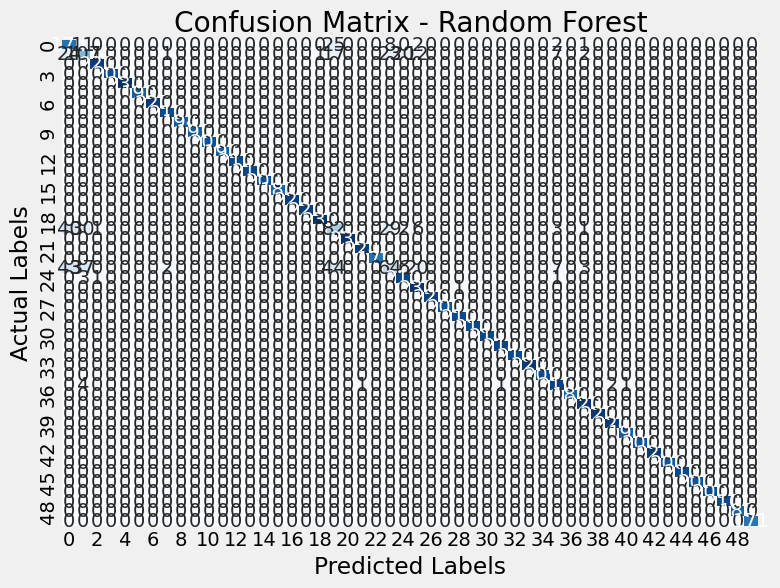

KNN Accuracy: 0.40751280591918043


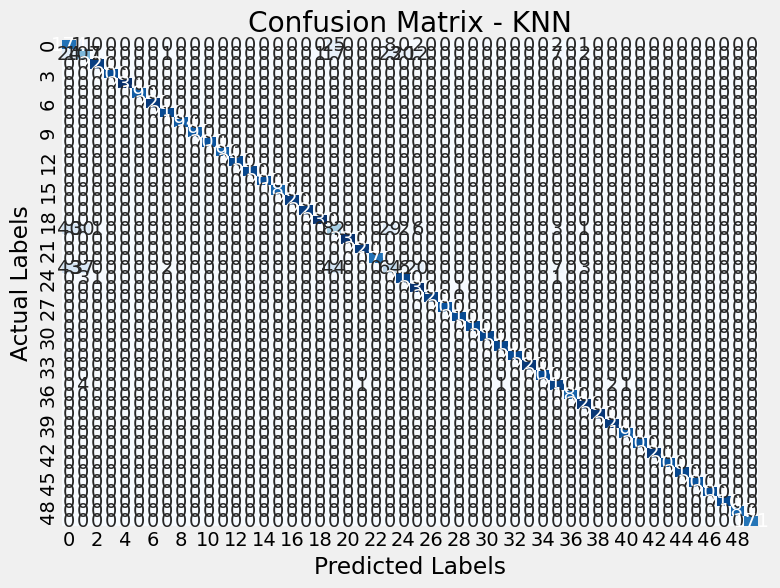

SVM Accuracy: 0.23562891291974958


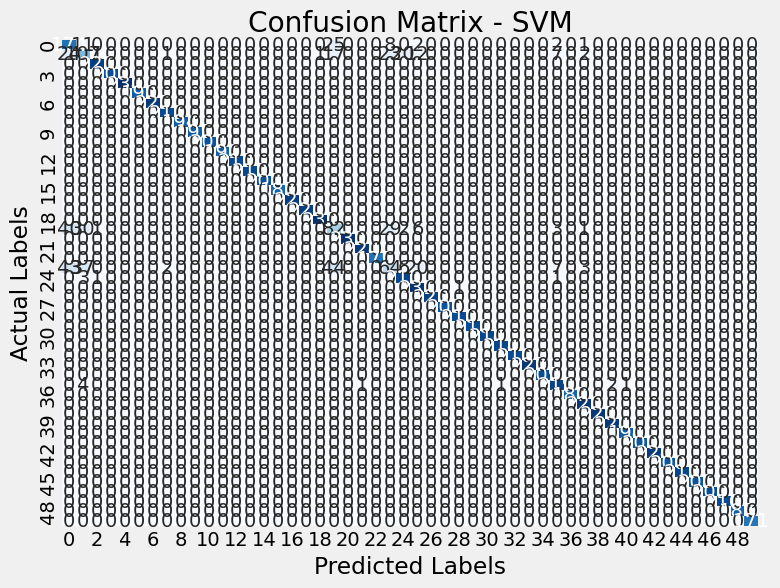

Naive Bayes Accuracy: 0.3437677859988617


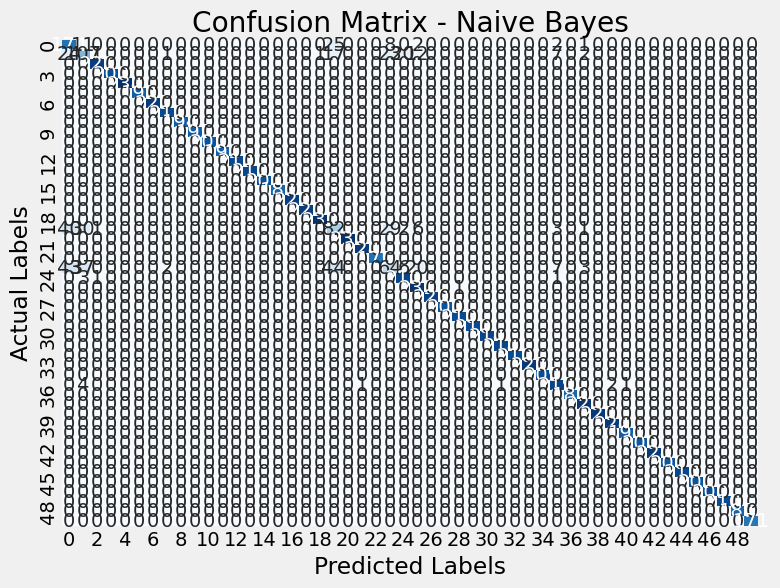

Gradient Boosting Accuracy: 0.4348321001707456


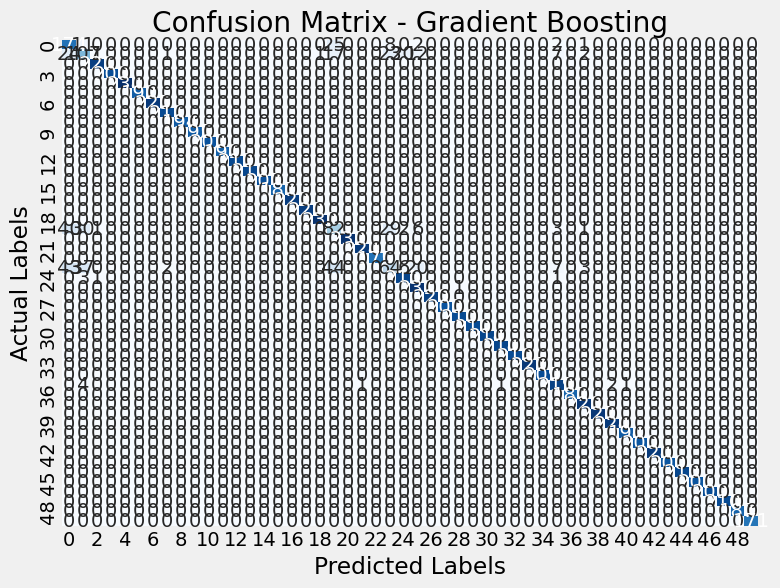

In [ ]:
def plot_confusion_matrix(ytrue, ypred, title):
    cm = confusion_matrix(ytrue, ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()
accuracy_scores = []
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(xtrain1, ytrain1)
    ypred = classifier.predict(xtest1)
    accuracy = accuracy_score(ytest1, ypred)
    accuracy_scores.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

    ytest_labels = label_encoder.inverse_transform(ytest1)
    ypred_labels = label_encoder.inverse_transform(ypred)

    plot_confusion_matrix(y_test_labels, y_pred_labels, f'Confusion Matrix - {name}')

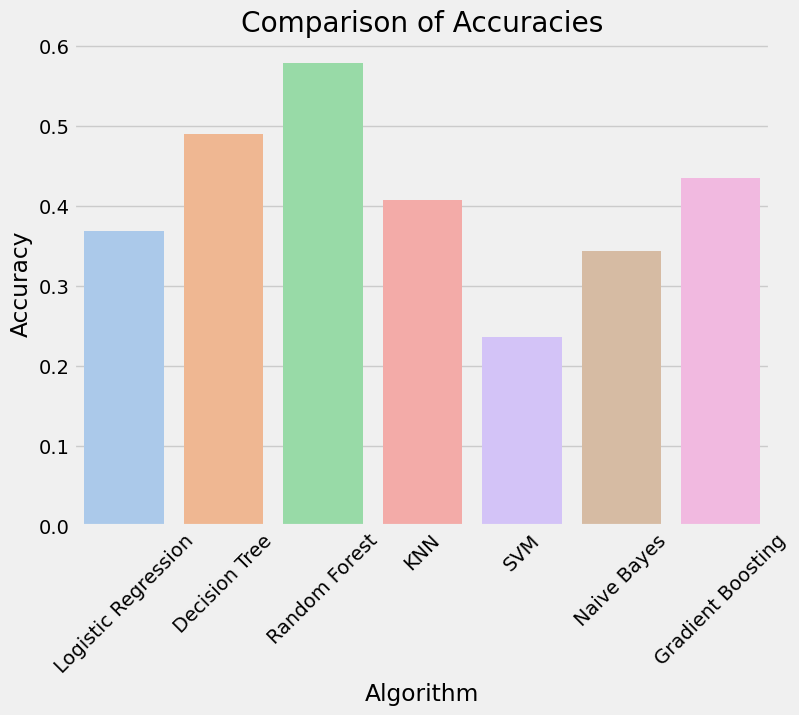

In [ ]:
accuracy_df = pd.DataFrame({'Algorithm': classifier_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='pastel')
plt.title('Comparison of Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred)}\n")

    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(xtrain, ytrain)

print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1       2       3       4       5       6       7  \
precision     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
recall        1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
f1-score      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
support    1883.0  1891.0  1885.0  1898.0  1872.0  1914.0  1881.0  1895.0   

                8       9  ...      43      44      45      46      47  \
precision     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0   
recall        1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0   
f1-score      1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0   
support    1912.0  1911.0  ...  1906.0  1893.0  1905.0  1897.0  1896.0   

               48      49  accuracy  macro avg  weighted avg  
precision     1.0     1.0       1.0        1.0           1.0  
recall  

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 99.39%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1       2       3       4       5       6  \
precision     0.921549     0.940647     1.0     1.0     1.0     1.0     1.0   
recall        0.960701     0.938657     1.0     1.0     1.0     1.0     1.0   
f1-score      0.940718     0.939651     1.0     1.0     1.0     1.0     1.0   
support    1883.000000  1891.000000  1885.0  1898.0  1872.0  1914.0  1881.0   

                7       8       9  ...      43      44      45      46  \
precision     1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
recall        1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
f1-score      1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
support    1895.0  1912.0  1911.0  ...  1906.0  1893.0  1905.0  1897.0   


In [ ]:
print (str(tree_clf.score(xtrain, ytrain) * 100 ) + ' %')

99.39326791178644 %


In [ ]:
ypred = tree_clf.predict(xtest)
print (str(accuracy_score(ypred, ytest) * 100 ) + ' %')

96.343779677113 %


In [ ]:
k_values = [i for i in range (3,12)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    tree_clf = DecisionTreeClassifier(random_state=100)
    score = cross_val_score(tree_clf, xtrain, ytrain, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

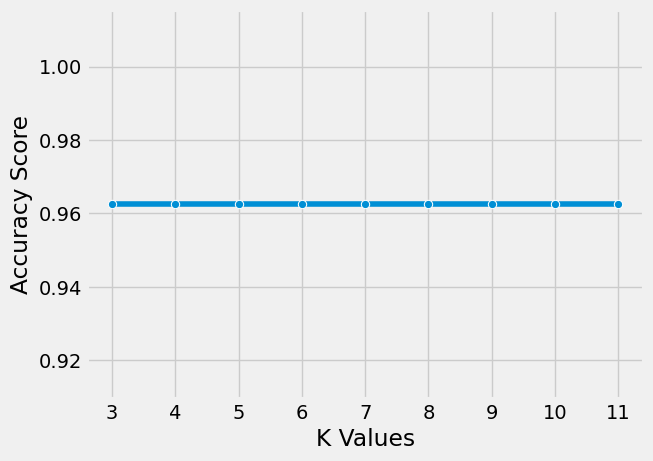

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [5]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import gradio as gra
def user_greeting(name):
     return "Hi! " + name + " Welcome to Project Weather Data!, I hope you enjoy and learn😎"

app =  gra.Interface(fn = user_greeting, inputs="text", outputs="text")
app.launch()

Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://2d6f2f29b8647961d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
